In [1]:
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
from IPython.display import Image
import numpy as np


Error importing in API mode: ImportError("dlopen(/opt/anaconda3/envs/jlab-e2/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <668E1903-F0E7-30D5-BA27-15F8287F87F7> /opt/anaconda3/envs/jlab-e2/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.
/opt/anaconda3/envs/jlab-e2/lib/python3.13/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/Users/happy2na/Downloads/notebook-benchm

In [2]:
ggplot2 = importr('ggplot2')

In [3]:
df = pd.DataFrame({
    'x': np.arange(1,10), 
    'y': np.arange(11,20)
})

In [4]:
df2 = pd.DataFrame({
    'x': np.arange(101,110), 
    'y': np.arange(111,120)
})

In [5]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    rdf = robjects.conversion.py2rpy(df)

In [6]:
robjects.globalenv['df'] = rdf

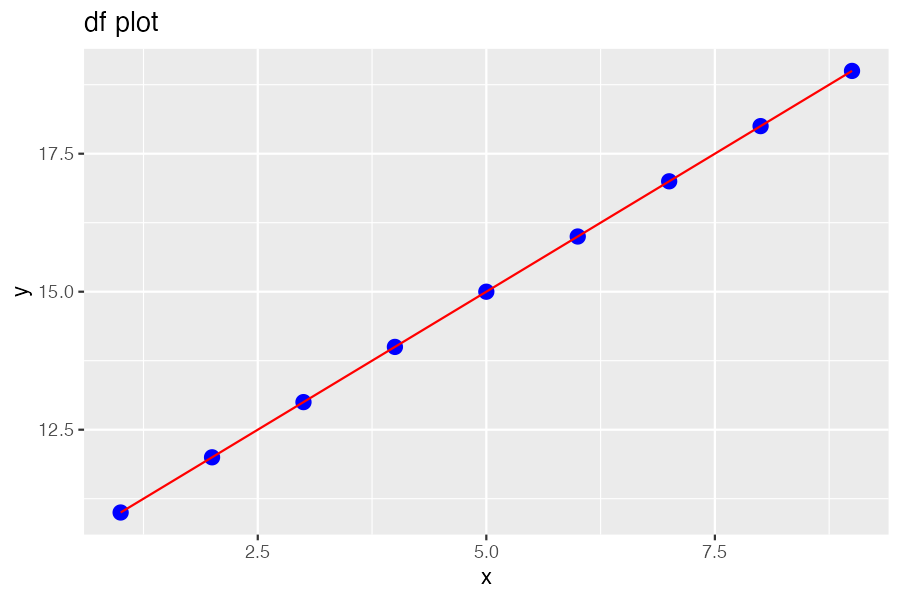

In [7]:
robjects.r('''
library(ggplot2)

p <- ggplot(df, aes(x = x, y = y)) +
  geom_point(color = "blue", size = 3) +
  geom_line(color = "red") +
  ggtitle("df plot")

ggsave("myplot.png", plot = p, width=6, height=4, dpi=150)
''')

Image(filename='myplot.png')